Let's make sure we are using tensorflow v2+

# Training and inference with colab
[Google colab](https://colab.research.google.com) is a free server for running notebooks with GPU/TPU support - this is a great way to use _DAS_ if you do not have a computer with a GPU.

This notebook demonstrates 
- how to setup _DAS_ 
- how to load your own datasets
- how to train a network and then use that network to label a new audio recording.

Open and edit this notebook in colab by clicking this badge:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/janclemenslab/das/blob/master/colab/colab.ipynb)

In [ ]:
%tensorflow_version 2.x

Install _DAS_:

In [ ]:
!pip install das

     |████████████████████████████████| 77 kB 3.0 MB/s eta 0:00:011
     |████████████████████████████████| 146 kB 7.1 MB/s 
     |████████████████████████████████| 6.2 MB 19.4 MB/s 
  Created wheel for defopt: filename=defopt-6.1.0-py3-none-any.whl size=14367 sha256=e283684ef3edbd107a13b2d88a61e4e1738bc416d8d1fe07af4499c65761f01a
  Stored in directory: /root/.cache/pip/wheels/8e/80/07/63d08d3ae3870730bdc3f4d639af4a141f50aa0da27e183912
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5051 sha256=8b134871e2a3d88db6eeeb1d6938976d2892be448eff2ecc74944e9eca70293f
  Stored in directory: /root/.cache/pip/wheels/12/1c/38/0def51e15add93bff3f4bf9c248b94db0839b980b8535e72a0
Successfully built defopt asciitree


Import all the things:

In [ ]:
import das.train, das.predict, das.utils, das.npy_dir
import matplotlib.pyplot as plt
import flammkuchen
import logging
logging.basicConfig(level=logging.INFO)

Mount your google drive so you can access your own datasets - this will ask for authentication.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Train the model
Adjust the variable `path_to_data` to point to the dataset on your own google drive.

In [5]:
path_to_data = '/content/drive/MyDrive/Dmoj.wrigleyi.npy'

das.train.train(model_name='tcn',
                data_dir=path_to_data,
                save_dir='res',
                nb_hist=1024,
                kernel_size=32,
                nb_filters=32,
                ignore_boundaries=True,
                verbose=2,
                nb_conv=4,
                learning_rate=0.0005,
                use_separable=[True, True, False, False],
                nb_epoch=1000)

INFO:root:Loading data from /content/drive/MyDrive/Dmoj.wrigleyi.npy.
INFO:root:Version of the data:
INFO:root:   MD5 hash of /content/drive/MyDrive/Dmoj.wrigleyi.npy is
INFO:root:   5381c36663f3b7286b0a5c42c0e3e463
INFO:root:Parameters:
INFO:root:{'data_dir': '/content/drive/MyDrive/Dmoj.wrigleyi.npy', 'y_suffix': '', 'save_dir': 'res', 'save_prefix': '', 'model_name': 'tcn', 'nb_filters': 32, 'kernel_size': 32, 'nb_conv': 4, 'use_separable': [True, True, False, False], 'nb_hist': 1024, 'ignore_boundaries': True, 'batch_norm': True, 'nb_pre_conv': 0, 'pre_nb_dft': 64, 'pre_kernel_size': 3, 'pre_nb_filters': 16, 'pre_nb_conv': 2, 'nb_lstm_units': 0, 'verbose': 2, 'batch_size': 32, 'nb_epoch': 1000, 'learning_rate': 0.0005, 'reduce_lr': False, 'reduce_lr_patience': 5, 'fraction_data': None, 'seed': None, 'batch_level_subsampling': False, 'tensorboard': False, 'neptune_api_token': None, 'neptune_project': None, 'log_messages': False, 'nb_stacks': 2, 'with_y_hist': True, 'x_suffix': '', '

Model: "TCN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024, 16)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1024, 32)     544         input_1[0][0]                    
__________________________________________________________________________________________________
separable_conv1d (SeparableConv (None, 1024, 32)     8224        conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 1024, 32)     0           separable_conv1d[0][0]           
________________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_loss improved from inf to 0.04569, saving model to res/20210925_132436_model.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


47/47 - 68s - loss: 0.0796 - val_loss: 0.0457
Epoch 2/1000

Epoch 00002: val_loss improved from 0.04569 to 0.04298, saving model to res/20210925_132436_model.h5
47/47 - 21s - loss: 0.0333 - val_loss: 0.0430
Epoch 3/1000

Epoch 00003: val_loss improved from 0.04298 to 0.04224, saving model to res/20210925_132436_model.h5
47/47 - 21s - loss: 0.0325 - val_loss: 0.0422
Epoch 4/1000

Epoch 00004: val_loss improved from 0.04224 to 0.04108, saving model to res/20210925_132436_model.h5
47/47 - 21s - loss: 0.0317 - val_loss: 0.0411
Epoch 5/1000

Epoch 00005: val_loss did not improve from 0.04108
47/47 - 21s - loss: 0.0328 - val_loss: 0.0416
Epoch 6/1000

Epoch 00006: val_loss improved from 0.04108 to 0.04089, saving model to res/20210925_132436_model.h5
47/47 - 21s - loss: 0.0301 - val_loss: 0.0409
Epoch 7/1000

Epoch 00007: val_loss did not improve from 0.04089
47/47 - 21s - loss: 0.0303 - val_loss: 0.0410
Epoch 8/1000

Epoch 00008: val_loss did not improve from 0.04089
47/47 - 21s - loss: 0.0

INFO:root:re-loading last best model
INFO:root:predicting
INFO:root:evaluating
INFO:root:[[354461   1856]
 [  1718  10605]]
INFO:root:{'noise': {'precision': 0.9951765825610157, 'recall': 0.9947911550669769, 'f1-score': 0.9949838314881768, 'support': 356317}, 'pulse': {'precision': 0.8510552925126394, 'recall': 0.8605858962914875, 'f1-score': 0.8557940606843125, 'support': 12323}, 'accuracy': 0.9903049045138889, 'macro avg': {'precision': 0.9231159375368276, 'recall': 0.9276885256792322, 'f1-score': 0.9253889460862447, 'support': 368640}, 'weighted avg': {'precision': 0.9903588561686921, 'recall': 0.9903049045138889, 'f1-score': 0.9903309572867444, 'support': 368640}}
INFO:root:saving to res/20210925_132436_results.h5.
/usr/local/lib/python3.7/dist-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: 'f1-score'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``

(<keras.engine.functional.Functional at 0x7f269f6ed290>,
 {'balance': False,
  'batch_level_subsampling': False,
  'batch_norm': True,
  'batch_size': 32,
  'class_names': ['noise', 'pulse'],
  'class_types': ['segment', 'event'],
  'class_weights': None,
  'data_dir': '/content/drive/MyDrive/Dmoj.wrigleyi.npy',
  'data_hash': '5381c36663f3b7286b0a5c42c0e3e463',
  'data_padding': 128,
  'filename_endsample_test': [],
  'filename_endsample_train': [],
  'filename_endsample_val': [],
  'filename_startsample_test': [],
  'filename_startsample_train': [],
  'filename_startsample_val': [],
  'filename_test': [],
  'filename_train': [],
  'filename_val': [],
  'first_sample_train': 0,
  'first_sample_val': 0,
  'fraction_data': None,
  'ignore_boundaries': True,
  'kernel_size': 32,
  'last_sample_train': None,
  'last_sample_val': None,
  'learning_rate': 0.0005,
  'log_messages': False,
  'model_name': 'tcn',
  'nb_channels': 16,
  'nb_classes': 2,
  'nb_conv': 4,
  'nb_epoch': 1000,
  'nb

Adjust the name to point to the results:

In [7]:
res_name = '/content/res/20210925_132436'
res = flammkuchen.load(f'{res_name}_results.h5')

Inspect the history of the training and validation loss

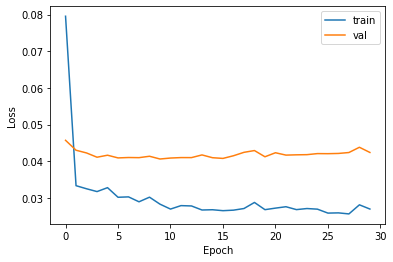

In [8]:
plt.plot(res['fit_hist']['loss'], label='train')
plt.plot(res['fit_hist']['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot the test results:

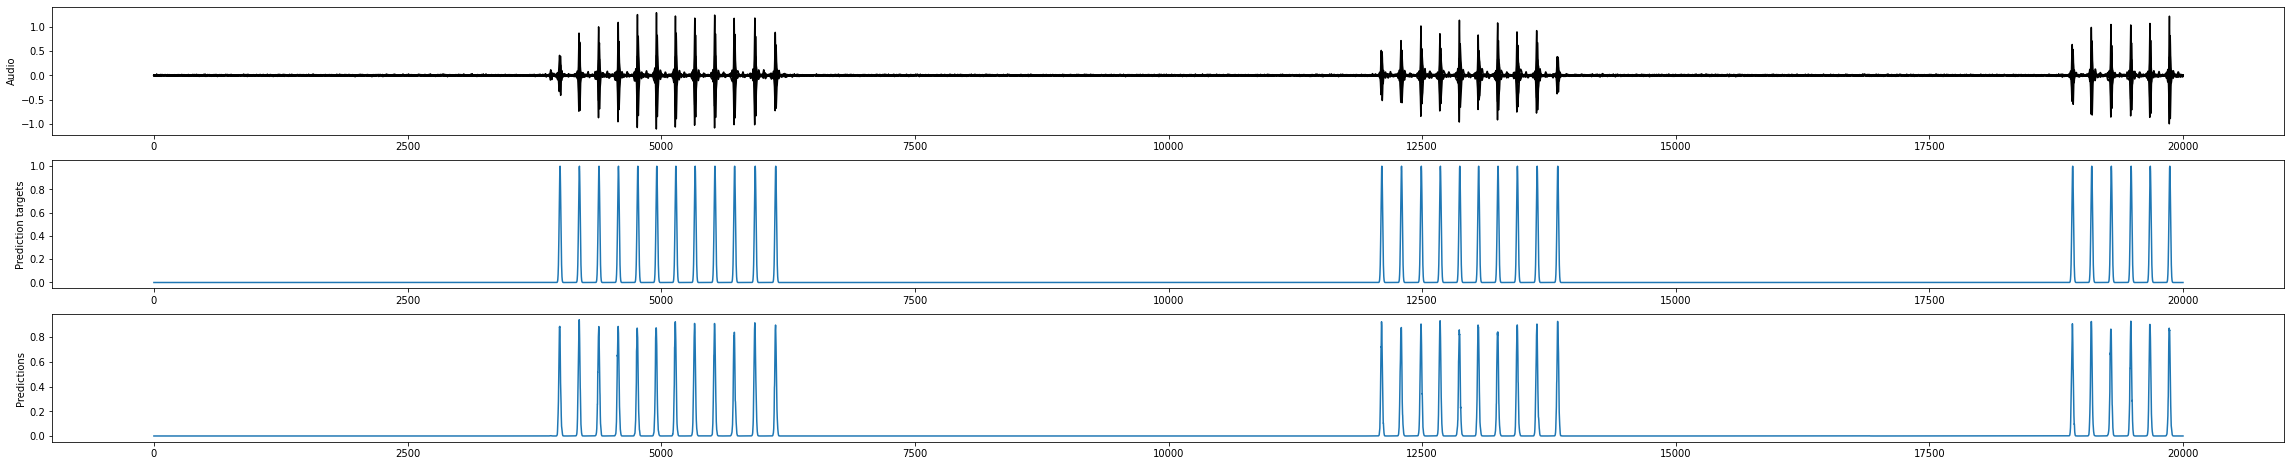

In [9]:
# t0, t1 = 1_020_000, 1_040_000  # dmel tutorial dataset
t0, t1 = 40_000, 60_000

plt.figure(figsize=(40, 8))
plt.subplot(311)
plt.plot(res['x_test'][t0:t1], 'k')
plt.ylabel('Audio')

plt.subplot(312)
plt.plot(res['y_test'][t0:t1, 1:])
plt.ylabel('Prediction targets')

plt.subplot(313)
plt.plot(res['y_pred'][t0:t1, 1:])
plt.ylabel('Predictions')

plt.show()

You can download the model results via the file tab on the left, from `/contest/res`

## Predict on new data
Load a new recording for prediction

In [10]:
model, params = das.utils.load_model_and_params(res_name)  # load the model and runtime parameters
ds = das.npy_dir.load('/content/drive/MyDrive/Dmoj.wrigleyi.npy', memmap_dirs=['train','val'])  # load the new data
print(ds)
x = ds['test']['x']

Data:
   test:
      x: (386000, 16)
      y: (386000, 2)
   val:
      y: (386000, 2)
      x: (386000, 16)
   train:
      y: (1158000, 2)
      x: (1158000, 16)

Attributes:
    class_names: ['noise', 'pulse']
    class_types: ['segment', 'event']
    filename_endsample_test: []
    filename_endsample_train: []
    filename_endsample_val: []
    filename_startsample_test: []
    filename_startsample_train: []
    filename_startsample_val: []
    filename_train: []
    filename_val: []
    samplerate_x_Hz: 10000.0
    samplerate_y_Hz: 10000.0
    filename_test: []



Run inference - this will calculate the confidence score and extract segment boundaries and event times.

In [14]:
events, segments, class_probabilities, _ = das.predict.predict(x, model=model, params=params, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


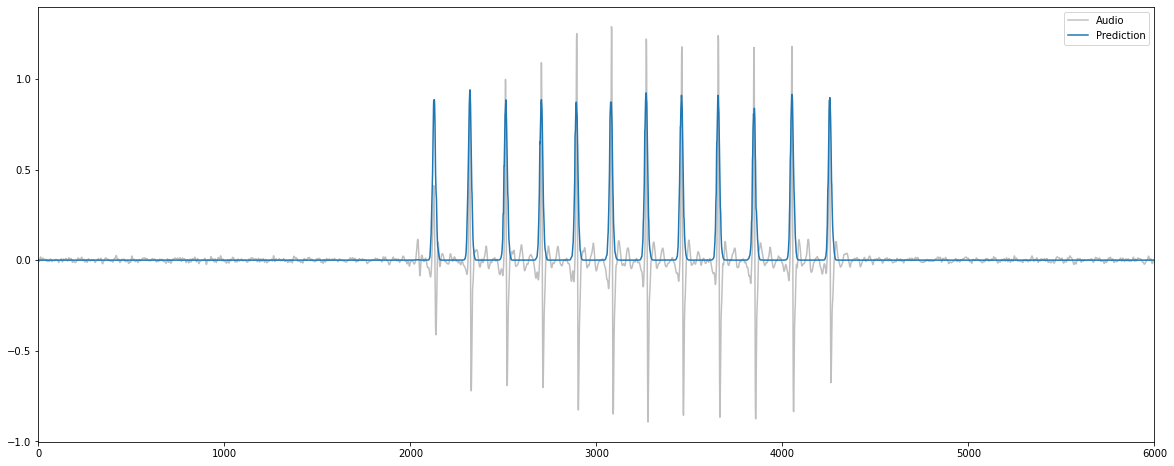

In [25]:
t0, t1 = 42_000, 48_000
plt.figure(figsize=(20, 8))
plt.plot(x[t0:t1, 0], alpha=0.25, c='k', label='Audio')
plt.plot(class_probabilities[t0:t1, 1:], label='Prediction')
plt.xlim(0, t1-t0)
plt.legend(['Audio', 'Prediction'])
plt.show()